<a href="https://colab.research.google.com/github/Sushsuvarna3/-ML-Mini-Project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
import bing_image_downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader 
downloader.download('orange fruit', limit=500,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://www.rd.com/wp-content/uploads/2017/12/01_oranges_Finally—Here’s-Which-“Orange”-Came-First-the-Color-or-the-Fruit_691064353_Lucky-Business.jpg
[!] Issue getting: https://www.rd.com/wp-content/uploads/2017/12/01_oranges_Finally—Here’s-Which-“Orange”-Came-First-the-Color-or-the-Fruit_691064353_Lucky-Business.jpg
[!] Error:: 'ascii' codec can't encode character '\u2014' in position 50: ordinal not in range(128)
[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Orange-Whole-%26-Split.jpg/1920px-Orange-Whole-%26-Split.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.freshfruitportal.com/assets/uploads/2014/06/orange-square.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://healthyliving.natureloc.com/wp-content/uploads/2015/09/Health-benefits-of-orange.jpg
[!] Issue getting: http://healthyliving.natureloc.com/wp-content/upload

In [ ]:
from bing_image_downloader import downloader 
downloader.download('lemon fruit', limit=500,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from http://liveseasoned.com/wp-content/uploads/2015/06/Lemon-Whole-Split.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914820-1000-1000.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://iheartsomething.files.wordpress.com/2013/05/lemon1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://keelings.ie/wp-content/uploads/2016/04/citrus-1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914824-3000-2000.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://golden-fruits.com/wp-content/uploads/2018/02/lemon-xrysikos-500x500.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://media.buzzle.com/media/images-en/gallery/fruits/1200-127029705-lemon-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://4.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
dir = '/content/images'
categories= ['orange fruit','lemon fruit']

In [ ]:
data= []
for category in categories  :
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        
        pet = cv2.imread(imgpath,0)
        try:
           pet = cv2.cvtColor(pet,cv2.COLOR_BGR2RGB)
           pet = cv2.resize(pet,(64,64))
           image=np.array(pet).flatten()
           data.append([image,label])
        except Exception as e:
          pass

print(len(data))

1000


In [ ]:
pick_in=open('data.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [ ]:
pick_in=open('data.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [ ]:
random.shuffle(data)
features = []
labels = []

In [ ]:
for feature ,label in data:
  features.append(feature)
  labels.append(label)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size= 0.98)

In [ ]:
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

In [ ]:
pick = open('model.sav','rb')
model = pickle.load(pick)
pick.close()

In [ ]:
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

In [ ]:
categories = ['orange fruit','lemon fruit']

In [ ]:
print('Accuracy :',accuracy)
print('Prediction  is :',categories[prediction[0]])


Accuracy : 0.4959183673469388
Prediction  is : lemon fruit


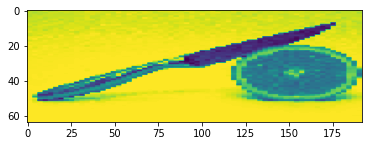

In [ ]:
mypet = xtest[0].reshape(64,192)
cv2.cvtColor(mypet,cv2.COLOR_BGR2RGB)
plt.imshow(mypet)
plt.show()